In [61]:
import numpy as np
import matplotlib.pylab as plt
import ot

In [62]:
import ot
from utils import simulate_dataset, format_dataset, simulate_dataset_UF
from repairs import DI_list_geometric_repair, DI_list_random_repair,DI_list_merge_repair
from sklearn.manifold import TSNE
from disparate import *

In [63]:
#colours 
blue1 = '#1f77b4' # darker blue
blue2 = '#aec7e8' # lighter blue

# Two shades of red
red1 = '#d62728' # darker red
red2 = '#ff9896' # lighter red



In [64]:
# Parameters for the simulation
n0 = 600
n1 = 600
# mu0 = (3, 3, 2, 2.5, 3.5)
# mu1 = (4, 4, 3, 3.5, 4.5)
# sigma = np.diag([1, 1, 0.5, 0.5, 1])
# beta0 = (1, -1, -0.5, 1, -1)
# beta1 = (1, -0.4, 1, -1, 1)


mu0 = (3, 3, 3)
mu1 = (6, 6, 6)
mu2 = (4, 4, 4)
mu3 = (7, 7, 7)

sigma = np.diag([1, 1, 1])
simga2 = np.diag([1, 1, 1, 1])
beta0 = (1, -1, -0.5)
beta1 = (1, -.8, 1)

#betat is the probability of being in group 1

# # Simulate the dataset
X0, X1, Y0, Y1 = simulate_dataset(n0, n1, mu0, mu1, sigma, beta0, beta1)



In [65]:
prob  = 0.5
prob1 = 0.6
d  = 3
#simulate unfair dataset
X0_U, X1_U, Y0_U, Y1_U = simulate_dataset_UF(n0, n1, mu0, mu1, mu2, mu3, sigma, beta0, beta1,  prob,prob1, d)


In [66]:
#format the dataset
X_U,Y_U = format_dataset(X0_U, X1_U, Y0_U, Y1_U)


ValueError: x and y must be the same size

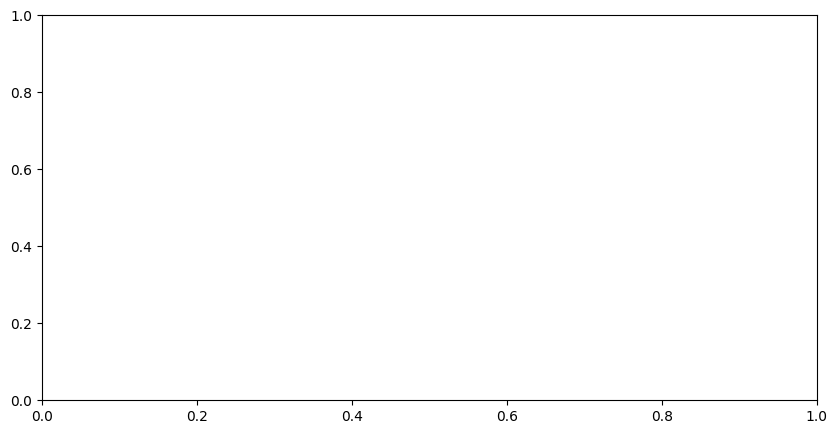

In [103]:
#plot the dataset
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.scatter(X0[Y0 == i, 0], X0[Y1 == i, 1], c=[blue1, red1][i], label=r'$A_p$ = %d' % i)

plt.title('Dataset')
plt.legend()
plt.show()

In [70]:
iter = 100
DI_geometric, X0r, X1r, y0, y1, accuracys, F1_geometric = DI_list_geometric_repair(X0, X1, beta0, beta1, iter)
DI_geometric= np.array(DI_geometric)


<Figure size 1000x800 with 0 Axes>

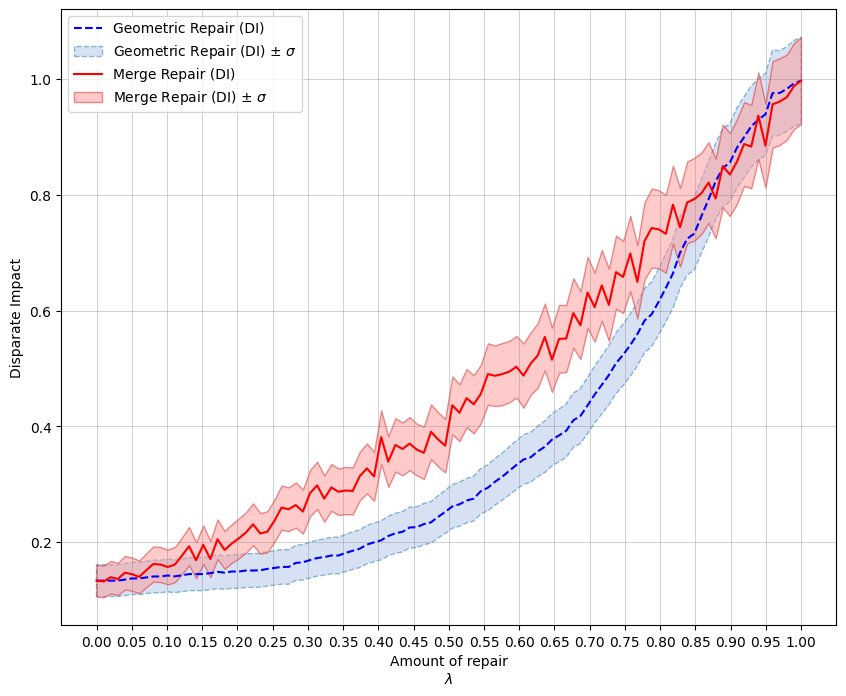

In [97]:
#---format the repaired dataset
fig = plt.figure(figsize=(10, 8))
iter = 100
DI_merge, accuracy2, F1_merge = DI_list_merge_repair(X0, X1, beta0, beta1, iter)
DI_merge = np.array(DI_merge)




alpha = np.linspace(0,1,iter)


fig = plt.figure(figsize=(10, 8))
plt.plot(alpha,DI_geometric[:,1], label = 'Geometric Repair (DI)', color = 'blue', linestyle = 'dashed')
plt.fill_between(alpha, DI_geometric[:,2], DI_geometric[:,0], alpha=0.5, edgecolor=blue1, facecolor=blue2, linewidth=1, antialiased=True, linestyle = 'dashed', label=r'Geometric Repair (DI) ± $\sigma$')

plt.plot(alpha,DI_merge[:,1], label = 'Merge Repair (DI)', color = 'red')
plt.fill_between(alpha, DI_merge[:,2], DI_merge[:,0], alpha=0.5, edgecolor=red1, facecolor=red2, linewidth=1, antialiased=True, label=r'Merge Repair (DI) ± $\sigma$')
plt.xlabel('Amount of repair\n'+r'$\lambda$')
plt.ylabel('Disparate Impact')
plt.legend()
# generate a sequence of 5 evenly spaced numbers between 0 and 4
grid_pos = np.arange(0, 1.05, 0.05)

# draw vertical grid lines at the specified positions
plt.grid(axis='both', color='grey', linewidth=.5, linestyle='-', which='major', alpha=0.5)
plt.gca().set_xticks(grid_pos, minor=False)
plt.show()







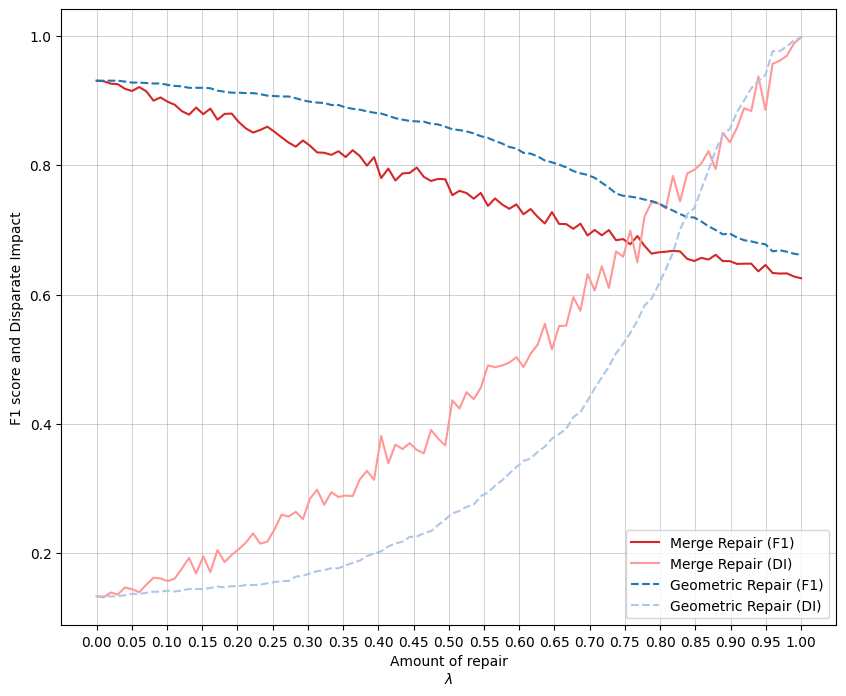

In [105]:
#FI score
fig = plt.figure(figsize=(10, 8))

plt.plot(alpha,F1_merge, label = 'Merge Repair (F1)', color = red1)
plt.plot(alpha,DI_merge[:,1], label = 'Merge Repair (DI)', color = red2)
plt.plot(alpha,F1_geometric, label = 'Geometric Repair (F1)', color = blue1, linestyle = 'dashed')
plt.plot(alpha,DI_geometric[:,1], label = 'Geometric Repair (DI)', color = blue2, linestyle = 'dashed')
plt.xlabel('Amount of repair\n'+r'$\lambda$')
plt.ylabel('F1 score and Disparate Impact')
plt.legend()
# generate a sequence of 5 evenly spaced numbers between 0 and 4
grid_pos = np.arange(0, 1.05, 0.05)

# draw vertical grid lines at the specified positions
plt.grid(axis='both', color='grey', linewidth=.5, linestyle='-', which='major', alpha=0.5)
plt.gca().set_xticks(grid_pos, minor=False)
plt.show()




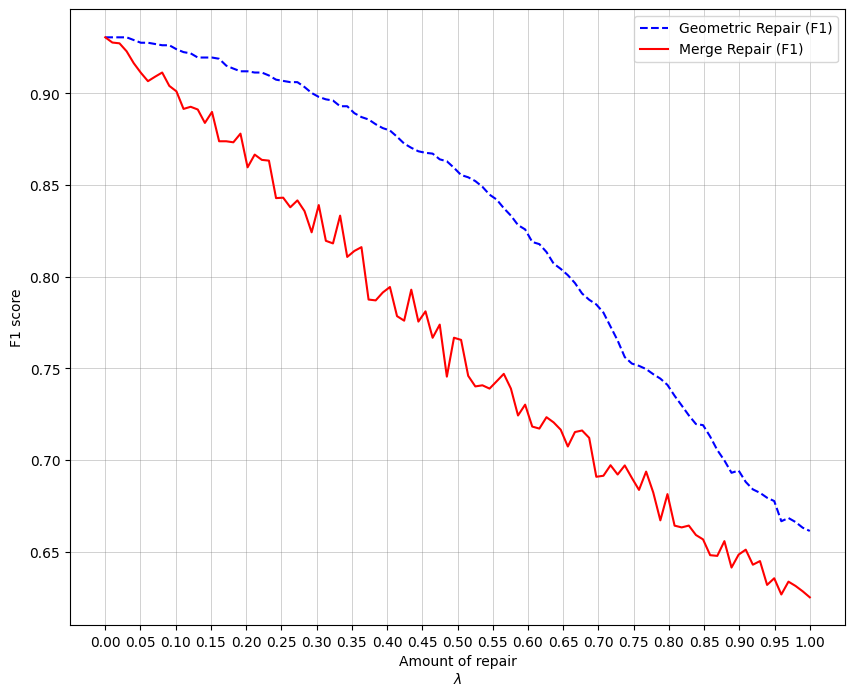

In [85]:
fig = plt.figure(figsize=(10, 8))
plt.plot(D,F1_geometric, label = 'Geometric Repair (F1)', color = 'blue', linestyle = 'dashed')
plt.plot(alpha,F1_merge, label = 'Merge Repair (F1)', color = 'red')


plt.xlabel('Amount of repair\n'+r'$\lambda$')
plt.ylabel('F1 score')
plt.legend()
# generate a sequence of 5 evenly spaced numbers between 0 and 4
grid_pos = np.arange(0, 1.05, 0.05)

# draw vertical grid lines at the specified positions
plt.grid(axis='both', color='grey', linewidth=.5, linestyle='-', which='major', alpha=0.5)
plt.gca().set_xticks(grid_pos, minor=False)
plt.show()
